# Задача 2

Теперь на основе данных о выручке рассчитаем несколько относительных показателей, которые покажут, сколько в среднем потребители готовы платить за услуги нашего сервиса доставки. Остановимся на следующих метриках:

1. ARPU (Average Revenue Per User) — средняя выручка на одного пользователя за определённый период.

2. ARPPU (Average Revenue Per Paying User) — средняя выручка на одного платящего пользователя за определённый период.

3. AOV (Average Order Value) — средний чек, или отношение выручки за определённый период к общему количеству заказов за это же время.

Задание:

Для каждого дня в таблицах orders и user_actions рассчитайте следующие показатели:

1. Выручку на пользователя (ARPU) за текущий день.
2. Выручку на платящего пользователя (ARPPU) за текущий день.
3. Выручку с заказа, или средний чек (AOV) за текущий день.
Колонки с показателями назовите соответственно arpu, arppu, aov. Колонку с датами назовите date. 

При расчёте всех показателей округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты. 

Поля в результирующей таблице: date, arpu, arppu, aov

```sql
with revenue_table AS (
  SELECT
    date,
    sum(price) AS revenue
  FROM
    (
      SELECT
        unnest_query.date,
        unnest_query.product_id,
        products.price AS price
      FROM
        (
          SELECT
            order_id,
            creation_time :: date AS date,
            unnest(product_ids) AS product_id
          FROM
            orders
        ) AS unnest_query
        JOIN products using (product_id)
      WHERE
        unnest_query.order_id NOT in (
          SELECT
            order_id
          FROM
            user_actions
          WHERE
            action = 'cancel_order'
        )
    ) AS subq
  GROUP BY
    1
),
total_users_table AS (
  SELECT
    time :: date AS date,
    count(distinct user_id) AS total_users
  FROM
    user_actions
  GROUP BY
    1
),
paying_users_table AS (
  SELECT
    ua.time :: date AS date,
    count(distinct ua.user_id) AS paying_users
  FROM
    user_actions ua
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
orders_table AS (
  SELECT
    creation_time :: date AS date,
    count(distinct order_id) AS act_orders
  FROM
    orders
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
)
SELECT
  revenue_table.date,
  round(revenue / total_users :: decimal, 2) AS arpu,
  round(revenue / paying_users :: decimal, 2) AS arppu,
  round(revenue / act_orders :: decimal, 2) AS aov
FROM
  revenue_table
  JOIN total_users_table using (date)
  JOIN paying_users_table using (date)
  JOIN orders_table using (date)
ORDER BY
  1
```

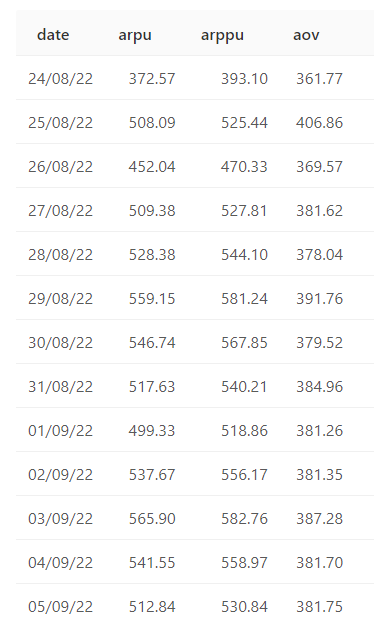

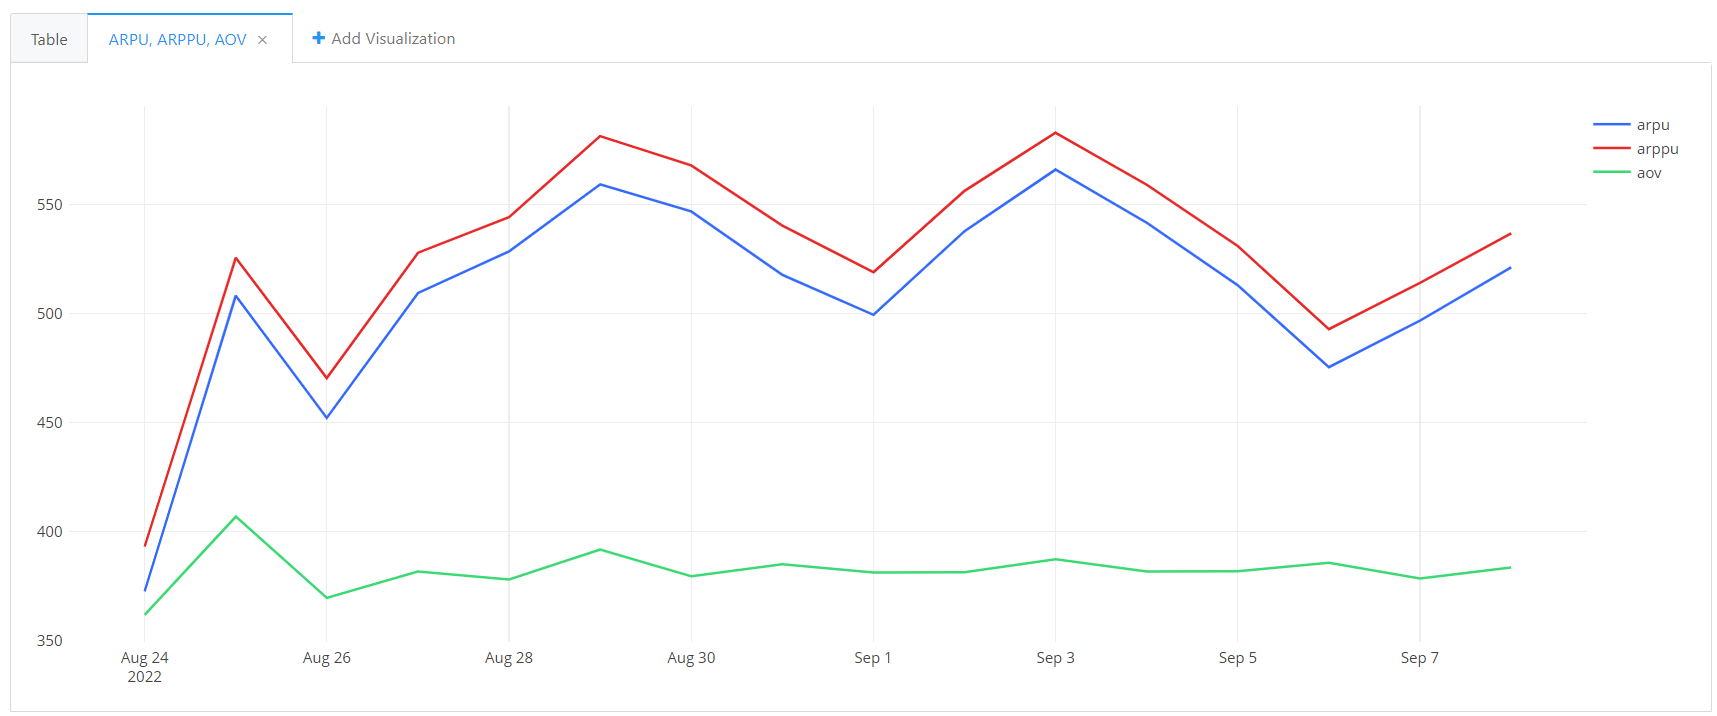